#Email Spam Detection

This program detects if an email is spam (1) or not (0)

In [ ]:
#importing required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import string
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt

In [ ]:
#uploading data
df = pd.read_csv('/content/spam.csv')

###Data Preprocessing 

In [ ]:
df['Category'].unique()

array(['ham', 'spam'], dtype=object)

In [ ]:
le= LabelEncoder()
df['Category'] = le.fit_transform(df['Category'])
df['Category'].unique()

array([0, 1])

In [ ]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.shape

(5572, 2)

In [ ]:
#removing dupliates
df.drop_duplicates(inplace = True)

In [ ]:
df.shape

(5157, 2)

In [ ]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# remove punctuation
#remove stopwords
#return a list of clean text words
def process_text(msg):
  nopunc = [ char for char in msg if char not in string.punctuation ]
  nopunc = ''.join(nopunc)

  clean_words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
  return clean_words

In [ ]:
df['Message'].head().apply(process_text)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: Message, dtype: object

In [ ]:
msg_bow = CountVectorizer(analyzer= process_text).fit_transform(df['Message'])


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(msg_bow, df['Category'], train_size= 0.8, random_state=0)

In [ ]:
msg_bow.shape

(5157, 11422)

###Training the Model

In [ ]:
classifier = MultinomialNB()
classifier.fit(x_train, y_train)


MultinomialNB()

In [ ]:
y_pred = classifier.predict(x_test)
print("Predicted values : ", y_pred)

Predicted values :  [0 0 0 ... 0 0 0]


###Model Evaluation

In [ ]:
#classifiction report
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("classification Report")
print(classification_report(y_test, y_pred))

classification Report
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       897
           1       0.81      0.93      0.86       135

    accuracy                           0.96      1032
   macro avg       0.90      0.95      0.92      1032
weighted avg       0.96      0.96      0.96      1032



Confusion matrix: 



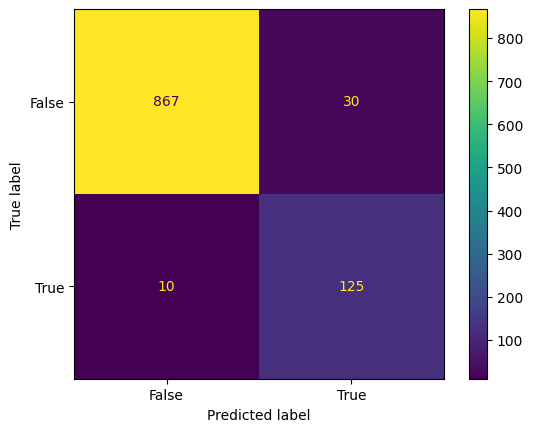

In [ ]:
print("Confusion matrix: ")
print()
# label = [False, True]
# cm = metrics.confusion_matrix(y_test, y_pred, labels = label)
# df_cm = pd.DataFrame(cm, label, label)
# ax = sns.heatmap(df_cm, annot=True, annot_kws={'size': 16}, cbar=False, fmt='g')
# ax.set_ylim(0, 3) 
# plt.xlabel('Predicted') 
# plt.ylabel('Actual') 
# ax.invert_yaxis()
# plt.show()

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
print("Accuracy: ", accuracy_score(y_test, y_pred)*100)

Accuracy:  96.12403100775194


###Conclusion
--
Here we predicted the whether the email is spam or ham using Multinomial Naive Bayes
